## Mini Project III

#### - twm_customer - information about customers
#### - twm_accounts - information about accounts
#### - twm_checking_accounts - information about checking accounts (subset of twm_accounts)
#### - twm_credit_accounts - information about checking accounts (subset of twm_accounts)
#### - twm_savings_accounts - information about checking accounts (subset of twm_accounts)
#### - twm_transactions - information about financial transactions
#### - twm_savings_tran - information about savings transactions (subset of twm_transactions)
#### - twm_checking_tran - information about savings transactions (subset of twm_transactions)
#### - twm_credit_tran - information about credit checking (subset of twm_transactions)

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [61]:
twm_customer = pd.read_csv("twm_customer.csv")
twm_accounts = pd.read_csv("twm_accounts.csv")
twm_checking_acct = pd.read_csv("twm_checking_acct.csv")
twm_credit_accounts = pd.read_csv("twm_credit_acct.csv")
twm_savings_accounts = pd.read_csv("twm_savings_acct.csv")
twm_transactions = pd.read_csv("twm_transactions.csv")
twm_savings_tran = pd.read_csv("twm_savings_tran.csv")
twm_checking_tran = pd.read_csv("twm_checking_tran.csv")
twm_credit_tran = pd.read_csv("twm_credit_tran.csv")

In [3]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [4]:
twm_customer.head()

,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
cust_id,,,,,,,,,,,,,,
1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


# 1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
### - based on demographics (only on the information from twm_customer)
### - based on their banking behavior. We can take following things into consideration as banking behavior:
- do they have savings account? How much do they save?
- do they have credit account? How much do they live in debt?
- are they making lot of small transactions or few huge ones?

In [5]:
# based on demographics
# 1. from twm_customer: use [age, nbr_children, gender, marital_status, city_name, postal_code]
cluster_twm_customer = twm_customer[["age", "income", "nbr_children", "years_with_bank", "marital_status"]]

In [6]:
cluster_twm_customer.head()

,age,income,nbr_children,years_with_bank,marital_status
cust_id,,,,,
1362691,46,26150,1,5,2
1362487,71,6605,0,1,2
1363160,38,18548,0,8,1
1362752,54,47668,0,3,1
1362548,59,44554,2,9,4


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
from sklearn.preprocessing import StandardScaler
col_names = ['income']
features = cluster_twm_customer[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [9]:
cluster_twm_customer["income_scaled"] = features

/var/folders/wg/4yj17hrn3q9g_27l8zsxxy5m0000gn/T/ipykernel_26758/1441923160.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_twm_customer["income_scaled"] = features


In [10]:
cluster_twm_customer = cluster_twm_customer.drop(columns=["income"])

In [11]:
cluster_twm_customer

,age,nbr_children,years_with_bank,marital_status,income_scaled
cust_id,,,,,
1362691,46,1,5,2,0.154185
1362487,71,0,1,2,-0.726524
1363160,38,0,8,1,-0.188366
1362752,54,0,3,1,1.123798
1362548,59,2,9,4,0.983479
...,...,...,...,...,...
1363324,36,1,6,4,-0.357478
1362895,56,1,6,2,0.164864
1362569,50,2,0,2,1.738064


In [12]:
kmeans_1 = KMeans(n_clusters=5,init='k-means++', random_state=0)
y_m1 = kmeans_1.fit(cluster_twm_customer)
Label_1 = y_m1.predict(cluster_twm_customer)

In [13]:
cluster_twm_customer["km_cluster"] = Label_1

In [28]:
cluster_twm_customer

,age,nbr_children,years_with_bank,marital_status,income_scaled
cust_id,,,,,
1362691,46,1,5,2,0.154185
1362487,71,0,1,2,-0.726524
1363160,38,0,8,1,-0.188366
1362752,54,0,3,1,1.123798
1362548,59,2,9,4,0.983479
...,...,...,...,...,...
1363324,36,1,6,4,-0.357478
1362895,56,1,6,2,0.164864
1362569,50,2,0,2,1.738064


# banking parse

In [49]:
savings_ = twm_savings_accounts[["cust_id","account_active","starting_balance","ending_balance"]]
credit_ = twm_credit_accounts[["cust_id","account_active","starting_balance","ending_balance"]]

In [52]:
savings_.columns = ["cust_id","savings_account_active","savings_starting_balance","savings_ending_balance"]

In [68]:
savings_transactions = twm_savings_tran[["cust_id","tran_amt"]]
df = pd.DataFrame(savings_transactions["cust_id"].value_counts())

In [76]:
df.head()

,num_of_sav_trans,cust_id
0,62,1363468
1,57,1362567
2,55,1362827
3,55,1362766
4,55,1362777


In [71]:
df.columns = ["num_of_sav_trans"]

In [73]:
df['cust_id'] = df.index

In [75]:
df = df.reset_index(drop=True)

In [77]:
df_sav = savings_.merge(df, on="cust_id", how = 'inner') # add col to savings_
# with total number of sav transactions

In [104]:
df_sav.columns = ["cust_id",
                   "savings_account_active",
                   "savings_starting_balance",
                   "savings_ending_balance",
                   "savings_num_of_sav_trans"]

In [105]:
df_sav.columns[1:]

Index(['savings_account_active', 'savings_starting_balance',
       'savings_ending_balance', 'savings_num_of_sav_trans'],
      dtype='object')

In [82]:
credit_.columns = ["cust_id","credit_account_active","credit_starting_balance","credit_ending_balance"]

In [85]:
credit_transactions = twm_credit_tran[["cust_id","tran_amt"]]
df2 = pd.DataFrame(credit_transactions["cust_id"].value_counts())


,cust_id
1363002,155
1362683,141
1362777,137
1363249,131
1362978,112


In [86]:
df2.columns = ["num_of_credit_trans"]

In [87]:
df2["cust_id"] = df2.index

In [89]:
df2.reset_index(drop=True)

,num_of_credit_trans,cust_id
0,155,1363002
1,141,1362683
2,137,1362777
3,131,1363249
4,112,1362978
...,...,...
452,1,1363237
453,1,1363133
454,1,1362619
455,1,1363169


In [91]:
df_credit = credit_.merge(df2, on="cust_id", how = 'inner') # add col to credit_
# with total number of credit transactions

In [97]:
df_credit

,cust_id,credit_account_active,credit_starting_balance,credit_ending_balance,num_of_credit_trans
0,1363160,Y,657.46,286.69,68
1,1362487,Y,0.00,1548.23,32
2,1362548,Y,6965.25,68.68,22
3,1362752,N,2302.14,0.00,15
4,1363017,Y,0.00,1000.00,63
...,...,...,...,...,...
452,1363364,N,1783.86,1785.97,75
453,1363467,Y,1193.89,1500.00,74
454,1363263,Y,0.00,1218.94,76
455,1362569,Y,0.00,9200.00,28


In [106]:
# merge df_sav and df_credit
df_all = df_sav.merge(df_credit,how="inner",on="cust_id")
df_all # why? mentor

,cust_id,savings_account_active,savings_starting_balance,savings_ending_balance,savings_num_of_sav_trans,credit_account_active,credit_starting_balance,credit_ending_balance,num_of_credit_trans
0,1363160,Y,113.04,122.54,48,Y,657.46,286.69,68
1,1362487,N,651.73,12.89,19,Y,0.00,1548.23,32
2,1362548,Y,250.24,254.02,12,Y,6965.25,68.68,22
3,1362752,Y,600.26,609.33,12,N,2302.14,0.00,15
4,1363017,N,2011.02,2901.35,24,Y,0.00,1000.00,63
...,...,...,...,...,...,...,...,...,...
282,1363284,Y,1454.16,860.93,31,Y,832.94,965.92,37
283,1362508,Y,121.64,255.11,33,Y,811.96,1072.17,87
284,1363038,Y,333.53,508.26,33,Y,0.00,1800.00,24
285,1362529,Y,662.06,873.14,21,N,1481.64,433.43,39


In [117]:
df_all_for_kmeans = df_all.drop(columns=["savings_account_active","credit_account_active"])

## 2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them against each other

In [16]:
import plotly.express as px
cluster_counts = list(cluster_twm_customer.km_cluster.value_counts())

In [17]:
cluster_counts

[175, 168, 165, 159, 80]

In [18]:
theta = []
for i in range(1,len(cluster_counts)+1):
    theta.append('Cluster_'+str(i))

In [19]:
d1 = pd.DataFrame([cluster_counts,theta]).transpose()
d1

,0,1
0,175,Cluster_1
1,168,Cluster_2
2,165,Cluster_3
3,159,Cluster_4
4,80,Cluster_5


In [20]:
d1.columns = ["r","theta"]

In [21]:
d1

,r,theta
0,175,Cluster_1
1,168,Cluster_2
2,165,Cluster_3
3,159,Cluster_4
4,80,Cluster_5


# radar 1

In [23]:
import plotly.express as px
fig = px.line_polar(d1, r='r', theta='theta', line_close=True)
fig.update_traces(fill='toself')
fig.show()

In [ ]:
cluster_twm_customer = cluster_twm_customer.drop(columns="km_cluster")

# scatter 1

<AxesSubplot:xlabel='axis1', ylabel='axis2'>

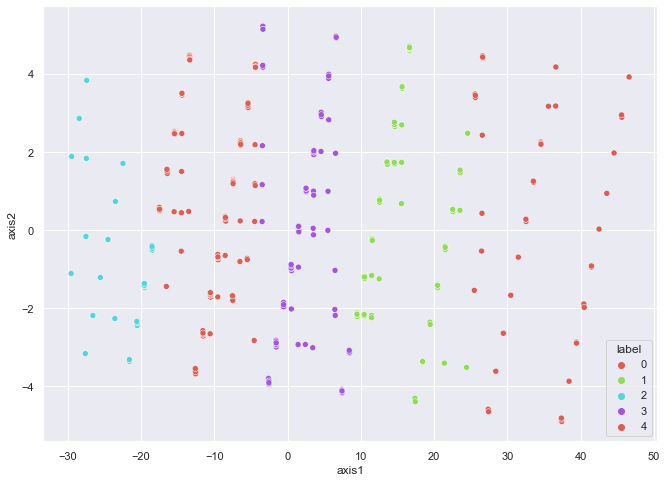

In [29]:
from sklearn.decomposition import PCA
import seaborn as sns

pca_1 = PCA(n_components=2)
data_1_2d = pca_1.fit_transform(cluster_twm_customer)
data_1_2d = pd.DataFrame(data_1_2d)
data_label = pd.DataFrame(Label_1)
df_plot_1 = pd.concat([data_1_2d,data_label],axis=1)
df_plot_1.columns = ['axis1','axis2','label']

sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(x='axis1', 
                y='axis2', 
                data=df_plot_1, 
                hue='label',
                palette='hls')

# radar 2

In [118]:
kmeans_2 = KMeans(n_clusters=5,init='k-means++', random_state=0)
y_m2 = kmeans_2.fit(df_all_for_kmeans)

Label_2 = y_m2.predict(df_all_for_kmeans)

In [120]:
df_all_for_kmeans["cluster"] = Label_2

In [124]:
cluster_cnt = list(df_all_for_kmeans.cluster.value_counts())

In [125]:
cluster_cnt

[191, 65, 15, 10, 6]

In [126]:
theta2 = []
for i in range(1,len(cluster_cnt)+1):
    theta2.append('Cluster_'+str(i))

In [127]:
d2 = pd.DataFrame([cluster_cnt,theta2]).transpose()
d2

,0,1
0,191,Cluster_1
1,65,Cluster_2
2,15,Cluster_3
3,10,Cluster_4
4,6,Cluster_5


In [128]:
d2.columns = ["r2","theta2"]
d2

,r2,theta2
0,191,Cluster_1
1,65,Cluster_2
2,15,Cluster_3
3,10,Cluster_4
4,6,Cluster_5


In [129]:
import plotly.express as px
fig2 = px.line_polar(d2, r='r2', theta='theta2', line_close=True)
fig2.update_traces(fill='toself')
fig2.show()

# scatter 2

In [130]:
df_all_for_kmeans = df_all_for_kmeans.drop(columns="cluster")

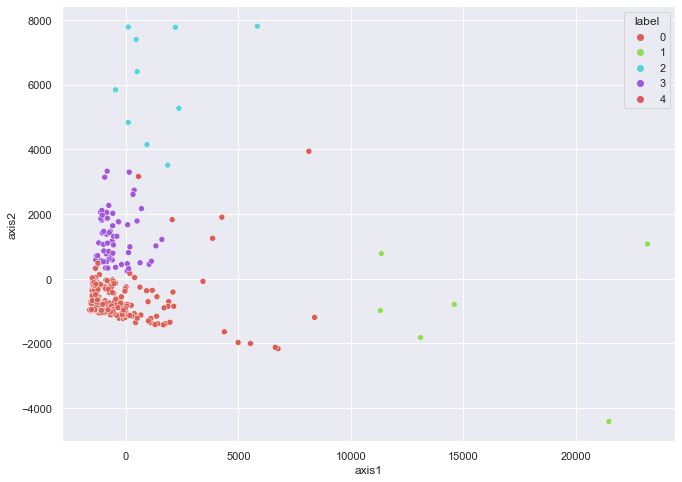

In [132]:
from sklearn.decomposition import PCA
import seaborn as sns

pca_2 = PCA(n_components=2)
data_2_2d = pca_2.fit_transform(df_all_for_kmeans)
data_2_2d = pd.DataFrame(data_2_2d)
data_label2 = pd.DataFrame(Label_2)
df_plot_2 = pd.concat([data_2_2d,data_label2],axis=1)
df_plot_2.columns = ['axis1','axis2','label']

sns.set(rc={'figure.figsize':(11,8)})
sns.scatterplot(x='axis1', 
                y='axis2', 
                data=df_plot_2, 
                hue='label',
                palette='hls');

## (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.